# CIFAR -10 Classification
Clone Github repo with all the modules

In [ ]:
!pwd
#%cd /content/EVA5

/content
[Errno 2] No such file or directory: '/content/EVA5'
/content


In [ ]:
!git clone https://github.com/vigneshbabupj/EVA5.git
#!git pull

Cloning into 'EVA5'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 121 (delta 55), reused 42 (delta 13), pack-reused 0
Receiving objects: 100% (121/121), 1.72 MiB | 4.08 MiB/s, done.
Resolving deltas: 100% (55/55), done.


In [ ]:
%cd /content/EVA5/models/

/content/EVA5/models


In [ ]:
!ls
from resnet import ResNet18

densenet.py	 __init__.py	 pnasnet.py	   resnext.py	    vgg.py
dpn.py		 lenet.py	 preact_resnet.py  senet.py
efficientnet.py  mobilenet.py	 regnet.py	   shufflenet.py
googlenet.py	 mobilenetv2.py  resnet.py	   shufflenetv2.py


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.optim as optim

Import Modules from Github repo

In [ ]:
%cd ../
#import Different modules
#from eva_model import Assign_7_Cifar10_model
from eva_data_loader import CIFAR10_dataloader
from eva_train import train
from eva_test import test
from  eva_utils import incorrect_images
import eva_regularization as rg

/content/EVA5


Use GPU engine

In [ ]:
# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True

seed=121

torch.manual_seed(seed)

print("Using Cuda : ", use_cuda)


Using Cuda :  True


## Data Loader

In [ ]:
Batch_Size = 128

train_loader,test_loader, classes = CIFAR10_dataloader(Batch_Size, use_cuda)

Extracting /data/cifar-10-python.tar.gz to /data/
Files already downloaded and verified


## Model Summary

In [ ]:
from torchsummary import summary

model = ResNet18().to(device)

summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

# Model Traning 

In [ ]:
model = ResNet18().to(device)

lambda_l1 = 0
lambda_l2 = 0

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=lambda_l2)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.01)

train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []

EPOCHS = 100
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_acc, train_loss = train(model, device, train_loader, optimizer, lambda_l1,criterion)
    train_losses.append(train_loss)
    train_accuracy.append(train_acc)

    #scheduler.step()
    test_acc, test_loss = test(model, device, test_loader, criterion)
    test_losses.append(test_loss)
    test_accuracy.append(test_acc)

#model_file = 'models/'+versions+'.pth'
#torch.save(model.state_dict(), model_file)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Train: Batch id: 390 	Loss: 1.073454	 Accuracy:47.012: 100%|██████████| 391/391 [00:24<00:00, 16.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008559, Accuracy: 6108/10000 (61.080%)

EPOCH: 1


Train: Batch id: 390 	Loss: 0.728212	 Accuracy:67.156: 100%|██████████| 391/391 [00:23<00:00, 16.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.006737, Accuracy: 7074/10000 (70.740%)

EPOCH: 2


Train: Batch id: 390 	Loss: 0.592609	 Accuracy:75.218: 100%|██████████| 391/391 [00:23<00:00, 16.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.005623, Accuracy: 7636/10000 (76.360%)

EPOCH: 3


Train: Batch id: 390 	Loss: 0.558932	 Accuracy:79.350: 100%|██████████| 391/391 [00:23<00:00, 16.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004462, Accuracy: 8121/10000 (81.210%)

EPOCH: 4


Train: Batch id: 390 	Loss: 0.648459	 Accuracy:82.138: 100%|██████████| 391/391 [00:23<00:00, 16.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004306, Accuracy: 8216/10000 (82.160%)

EPOCH: 5


Train: Batch id: 390 	Loss: 0.447922	 Accuracy:84.218: 100%|██████████| 391/391 [00:23<00:00, 16.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.005254, Accuracy: 7945/10000 (79.450%)

EPOCH: 6


Train: Batch id: 390 	Loss: 0.342447	 Accuracy:85.518: 100%|██████████| 391/391 [00:23<00:00, 16.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004464, Accuracy: 8233/10000 (82.330%)

EPOCH: 7


Train: Batch id: 390 	Loss: 0.305717	 Accuracy:86.858: 100%|██████████| 391/391 [00:23<00:00, 16.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003842, Accuracy: 8366/10000 (83.660%)

EPOCH: 8


Train: Batch id: 390 	Loss: 0.582715	 Accuracy:87.856: 100%|██████████| 391/391 [00:23<00:00, 16.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004109, Accuracy: 8342/10000 (83.420%)

EPOCH: 9


Train: Batch id: 390 	Loss: 0.248816	 Accuracy:88.838: 100%|██████████| 391/391 [00:23<00:00, 16.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003861, Accuracy: 8395/10000 (83.950%)

EPOCH: 10


Train: Batch id: 390 	Loss: 0.229582	 Accuracy:89.590: 100%|██████████| 391/391 [00:23<00:00, 16.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003036, Accuracy: 8743/10000 (87.430%)

EPOCH: 11


Train: Batch id: 390 	Loss: 0.327491	 Accuracy:90.300: 100%|██████████| 391/391 [00:23<00:00, 16.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003810, Accuracy: 8463/10000 (84.630%)

EPOCH: 12


Train: Batch id: 390 	Loss: 0.163482	 Accuracy:91.144: 100%|██████████| 391/391 [00:24<00:00, 16.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004015, Accuracy: 8426/10000 (84.260%)

EPOCH: 13


Train: Batch id: 390 	Loss: 0.329269	 Accuracy:91.560: 100%|██████████| 391/391 [00:23<00:00, 16.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003288, Accuracy: 8695/10000 (86.950%)

EPOCH: 14


Train: Batch id: 390 	Loss: 0.182871	 Accuracy:92.058: 100%|██████████| 391/391 [00:23<00:00, 16.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.002742, Accuracy: 8902/10000 (89.020%)

EPOCH: 15


Train: Batch id: 390 	Loss: 0.318233	 Accuracy:92.546: 100%|██████████| 391/391 [00:24<00:00, 16.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003754, Accuracy: 8636/10000 (86.360%)

EPOCH: 16


Train: Batch id: 390 	Loss: 0.185976	 Accuracy:93.002: 100%|██████████| 391/391 [00:23<00:00, 16.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003578, Accuracy: 8641/10000 (86.410%)

EPOCH: 17


Train: Batch id: 390 	Loss: 0.087580	 Accuracy:93.282: 100%|██████████| 391/391 [00:24<00:00, 16.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.002829, Accuracy: 8908/10000 (89.080%)

EPOCH: 18


Train: Batch id: 390 	Loss: 0.241728	 Accuracy:93.954: 100%|██████████| 391/391 [00:23<00:00, 16.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003308, Accuracy: 8806/10000 (88.060%)

EPOCH: 19


Train: Batch id: 390 	Loss: 0.125559	 Accuracy:94.032: 100%|██████████| 391/391 [00:23<00:00, 16.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003532, Accuracy: 8761/10000 (87.610%)

EPOCH: 20


Train: Batch id: 390 	Loss: 0.087508	 Accuracy:94.530: 100%|██████████| 391/391 [00:23<00:00, 16.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.002973, Accuracy: 8938/10000 (89.380%)

EPOCH: 21


Train: Batch id: 390 	Loss: 0.166898	 Accuracy:94.992: 100%|██████████| 391/391 [00:23<00:00, 16.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003191, Accuracy: 8876/10000 (88.760%)

EPOCH: 22


Train: Batch id: 390 	Loss: 0.203694	 Accuracy:95.180: 100%|██████████| 391/391 [00:23<00:00, 16.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.002888, Accuracy: 8953/10000 (89.530%)

EPOCH: 23


Train: Batch id: 390 	Loss: 0.202831	 Accuracy:95.120: 100%|██████████| 391/391 [00:23<00:00, 16.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.002894, Accuracy: 8992/10000 (89.920%)

EPOCH: 24


Train: Batch id: 390 	Loss: 0.223647	 Accuracy:95.722: 100%|██████████| 391/391 [00:23<00:00, 16.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.002942, Accuracy: 8950/10000 (89.500%)

EPOCH: 25


Train: Batch id: 390 	Loss: 0.084322	 Accuracy:96.008: 100%|██████████| 391/391 [00:23<00:00, 16.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003124, Accuracy: 8918/10000 (89.180%)

EPOCH: 26


Train: Batch id: 390 	Loss: 0.051791	 Accuracy:95.882: 100%|██████████| 391/391 [00:23<00:00, 16.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.002898, Accuracy: 9010/10000 (90.100%)

EPOCH: 27


Train: Batch id: 390 	Loss: 0.175064	 Accuracy:96.220: 100%|██████████| 391/391 [00:23<00:00, 16.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.002905, Accuracy: 9034/10000 (90.340%)

EPOCH: 28


Train: Batch id: 390 	Loss: 0.081942	 Accuracy:96.560: 100%|██████████| 391/391 [00:23<00:00, 16.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.002826, Accuracy: 9083/10000 (90.830%)

EPOCH: 29


Train: Batch id: 390 	Loss: 0.073966	 Accuracy:96.806: 100%|██████████| 391/391 [00:23<00:00, 16.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.002955, Accuracy: 9039/10000 (90.390%)

EPOCH: 30


Train: Batch id: 390 	Loss: 0.059197	 Accuracy:97.022: 100%|██████████| 391/391 [00:23<00:00, 16.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003297, Accuracy: 8971/10000 (89.710%)

EPOCH: 31


Train: Batch id: 390 	Loss: 0.117263	 Accuracy:97.048: 100%|██████████| 391/391 [00:23<00:00, 16.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003056, Accuracy: 9038/10000 (90.380%)

EPOCH: 32


Train: Batch id: 390 	Loss: 0.032742	 Accuracy:97.214: 100%|██████████| 391/391 [00:23<00:00, 16.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.002849, Accuracy: 9083/10000 (90.830%)

EPOCH: 33


Train: Batch id: 390 	Loss: 0.067077	 Accuracy:97.358: 100%|██████████| 391/391 [00:23<00:00, 16.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003133, Accuracy: 9058/10000 (90.580%)

EPOCH: 34


Train: Batch id: 390 	Loss: 0.056466	 Accuracy:97.460: 100%|██████████| 391/391 [00:23<00:00, 16.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003146, Accuracy: 9071/10000 (90.710%)

EPOCH: 35


Train: Batch id: 390 	Loss: 0.144007	 Accuracy:97.564: 100%|██████████| 391/391 [00:23<00:00, 16.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003108, Accuracy: 9074/10000 (90.740%)

EPOCH: 36


Train: Batch id: 390 	Loss: 0.037730	 Accuracy:97.712: 100%|██████████| 391/391 [00:23<00:00, 16.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003200, Accuracy: 9082/10000 (90.820%)

EPOCH: 37


Train: Batch id: 390 	Loss: 0.072817	 Accuracy:97.834: 100%|██████████| 391/391 [00:23<00:00, 16.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003317, Accuracy: 9052/10000 (90.520%)

EPOCH: 38


Train: Batch id: 390 	Loss: 0.031262	 Accuracy:98.016: 100%|██████████| 391/391 [00:23<00:00, 16.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003174, Accuracy: 9084/10000 (90.840%)

EPOCH: 39


Train: Batch id: 390 	Loss: 0.126551	 Accuracy:98.008: 100%|██████████| 391/391 [00:23<00:00, 16.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003302, Accuracy: 9084/10000 (90.840%)

EPOCH: 40


Train: Batch id: 390 	Loss: 0.114456	 Accuracy:98.048: 100%|██████████| 391/391 [00:23<00:00, 16.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003084, Accuracy: 9127/10000 (91.270%)

EPOCH: 41


Train: Batch id: 390 	Loss: 0.017819	 Accuracy:98.150: 100%|██████████| 391/391 [00:23<00:00, 16.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003197, Accuracy: 9094/10000 (90.940%)

EPOCH: 42


Train: Batch id: 390 	Loss: 0.066686	 Accuracy:98.446: 100%|██████████| 391/391 [00:23<00:00, 16.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003110, Accuracy: 9143/10000 (91.430%)

EPOCH: 43


Train: Batch id: 390 	Loss: 0.057688	 Accuracy:98.236: 100%|██████████| 391/391 [00:23<00:00, 16.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003429, Accuracy: 9050/10000 (90.500%)

EPOCH: 44


Train: Batch id: 390 	Loss: 0.036522	 Accuracy:98.330: 100%|██████████| 391/391 [00:23<00:00, 16.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003293, Accuracy: 9136/10000 (91.360%)

EPOCH: 45


Train: Batch id: 390 	Loss: 0.072225	 Accuracy:98.496: 100%|██████████| 391/391 [00:23<00:00, 16.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003257, Accuracy: 9102/10000 (91.020%)

EPOCH: 46


Train: Batch id: 390 	Loss: 0.007939	 Accuracy:98.706: 100%|██████████| 391/391 [00:23<00:00, 16.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003627, Accuracy: 9078/10000 (90.780%)

EPOCH: 47


Train: Batch id: 390 	Loss: 0.000321	 Accuracy:98.536: 100%|██████████| 391/391 [00:23<00:00, 16.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003088, Accuracy: 9151/10000 (91.510%)

EPOCH: 48


Train: Batch id: 390 	Loss: 0.085581	 Accuracy:98.544: 100%|██████████| 391/391 [00:23<00:00, 16.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003653, Accuracy: 9064/10000 (90.640%)

EPOCH: 49


Train: Batch id: 390 	Loss: 0.101722	 Accuracy:98.668: 100%|██████████| 391/391 [00:23<00:00, 16.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003400, Accuracy: 9126/10000 (91.260%)

EPOCH: 50


Train: Batch id: 390 	Loss: 0.059876	 Accuracy:98.784: 100%|██████████| 391/391 [00:23<00:00, 16.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003660, Accuracy: 9053/10000 (90.530%)

EPOCH: 51


Train: Batch id: 390 	Loss: 0.038217	 Accuracy:98.762: 100%|██████████| 391/391 [00:23<00:00, 16.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003400, Accuracy: 9116/10000 (91.160%)

EPOCH: 52


Train: Batch id: 390 	Loss: 0.025397	 Accuracy:98.682: 100%|██████████| 391/391 [00:23<00:00, 16.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003287, Accuracy: 9153/10000 (91.530%)

EPOCH: 53


Train: Batch id: 390 	Loss: 0.004657	 Accuracy:98.928: 100%|██████████| 391/391 [00:23<00:00, 16.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003153, Accuracy: 9175/10000 (91.750%)

EPOCH: 54


Train: Batch id: 390 	Loss: 0.011199	 Accuracy:99.102: 100%|██████████| 391/391 [00:24<00:00, 16.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003425, Accuracy: 9129/10000 (91.290%)

EPOCH: 55


Train: Batch id: 390 	Loss: 0.036163	 Accuracy:99.112: 100%|██████████| 391/391 [00:23<00:00, 16.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003494, Accuracy: 9135/10000 (91.350%)

EPOCH: 56


Train: Batch id: 390 	Loss: 0.047571	 Accuracy:98.992: 100%|██████████| 391/391 [00:23<00:00, 16.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003656, Accuracy: 9132/10000 (91.320%)

EPOCH: 57


Train: Batch id: 390 	Loss: 0.008906	 Accuracy:99.138: 100%|██████████| 391/391 [00:23<00:00, 16.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003340, Accuracy: 9159/10000 (91.590%)

EPOCH: 58


Train: Batch id: 390 	Loss: 0.006519	 Accuracy:98.978: 100%|██████████| 391/391 [00:23<00:00, 16.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003625, Accuracy: 9132/10000 (91.320%)

EPOCH: 59


Train: Batch id: 390 	Loss: 0.042048	 Accuracy:99.000: 100%|██████████| 391/391 [00:23<00:00, 16.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003589, Accuracy: 9167/10000 (91.670%)

EPOCH: 60


Train: Batch id: 390 	Loss: 0.034420	 Accuracy:99.014: 100%|██████████| 391/391 [00:23<00:00, 16.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003481, Accuracy: 9170/10000 (91.700%)

EPOCH: 61


Train: Batch id: 390 	Loss: 0.064648	 Accuracy:99.296: 100%|██████████| 391/391 [00:23<00:00, 16.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003339, Accuracy: 9164/10000 (91.640%)

EPOCH: 62


Train: Batch id: 390 	Loss: 0.002224	 Accuracy:99.132: 100%|██████████| 391/391 [00:23<00:00, 16.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003350, Accuracy: 9194/10000 (91.940%)

EPOCH: 63


Train: Batch id: 390 	Loss: 0.041148	 Accuracy:99.232: 100%|██████████| 391/391 [00:23<00:00, 16.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003554, Accuracy: 9158/10000 (91.580%)

EPOCH: 64


Train: Batch id: 390 	Loss: 0.030839	 Accuracy:99.186: 100%|██████████| 391/391 [00:23<00:00, 16.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003579, Accuracy: 9153/10000 (91.530%)

EPOCH: 65


Train: Batch id: 390 	Loss: 0.014366	 Accuracy:99.180: 100%|██████████| 391/391 [00:23<00:00, 16.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003694, Accuracy: 9162/10000 (91.620%)

EPOCH: 66


Train: Batch id: 390 	Loss: 0.013670	 Accuracy:99.256: 100%|██████████| 391/391 [00:23<00:00, 16.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003466, Accuracy: 9154/10000 (91.540%)

EPOCH: 67


Train: Batch id: 390 	Loss: 0.000751	 Accuracy:99.368: 100%|██████████| 391/391 [00:23<00:00, 16.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003575, Accuracy: 9163/10000 (91.630%)

EPOCH: 68


Train: Batch id: 390 	Loss: 0.022314	 Accuracy:99.250: 100%|██████████| 391/391 [00:23<00:00, 16.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003549, Accuracy: 9175/10000 (91.750%)

EPOCH: 69


Train: Batch id: 390 	Loss: 0.027402	 Accuracy:99.282: 100%|██████████| 391/391 [00:23<00:00, 16.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003605, Accuracy: 9169/10000 (91.690%)

EPOCH: 70


Train: Batch id: 390 	Loss: 0.011568	 Accuracy:99.390: 100%|██████████| 391/391 [00:23<00:00, 16.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003829, Accuracy: 9162/10000 (91.620%)

EPOCH: 71


Train: Batch id: 390 	Loss: 0.002184	 Accuracy:99.264: 100%|██████████| 391/391 [00:23<00:00, 16.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003336, Accuracy: 9209/10000 (92.090%)

EPOCH: 72


Train: Batch id: 390 	Loss: 0.008612	 Accuracy:99.320: 100%|██████████| 391/391 [00:23<00:00, 16.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003534, Accuracy: 9210/10000 (92.100%)

EPOCH: 73


Train: Batch id: 390 	Loss: 0.011703	 Accuracy:99.474: 100%|██████████| 391/391 [00:23<00:00, 16.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003431, Accuracy: 9225/10000 (92.250%)

EPOCH: 74


Train: Batch id: 390 	Loss: 0.004523	 Accuracy:99.538: 100%|██████████| 391/391 [00:24<00:00, 16.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003492, Accuracy: 9202/10000 (92.020%)

EPOCH: 75


Train: Batch id: 390 	Loss: 0.014727	 Accuracy:99.542: 100%|██████████| 391/391 [00:24<00:00, 16.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003437, Accuracy: 9221/10000 (92.210%)

EPOCH: 76


Train: Batch id: 390 	Loss: 0.005693	 Accuracy:99.494: 100%|██████████| 391/391 [00:24<00:00, 15.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003467, Accuracy: 9221/10000 (92.210%)

EPOCH: 77


Train: Batch id: 390 	Loss: 0.013672	 Accuracy:99.578: 100%|██████████| 391/391 [00:24<00:00, 15.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003406, Accuracy: 9243/10000 (92.430%)

EPOCH: 78


Train: Batch id: 390 	Loss: 0.002556	 Accuracy:99.650: 100%|██████████| 391/391 [00:25<00:00, 15.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003548, Accuracy: 9215/10000 (92.150%)

EPOCH: 79


Train: Batch id: 390 	Loss: 0.031589	 Accuracy:99.596: 100%|██████████| 391/391 [00:24<00:00, 15.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003612, Accuracy: 9217/10000 (92.170%)

EPOCH: 80


Train: Batch id: 390 	Loss: 0.038806	 Accuracy:99.618: 100%|██████████| 391/391 [00:24<00:00, 16.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003430, Accuracy: 9258/10000 (92.580%)

EPOCH: 81


Train: Batch id: 390 	Loss: 0.011373	 Accuracy:99.546: 100%|██████████| 391/391 [00:23<00:00, 16.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003324, Accuracy: 9222/10000 (92.220%)

EPOCH: 82


Train: Batch id: 390 	Loss: 0.006502	 Accuracy:99.640: 100%|██████████| 391/391 [00:23<00:00, 16.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003747, Accuracy: 9192/10000 (91.920%)

EPOCH: 83


Train: Batch id: 390 	Loss: 0.002244	 Accuracy:99.600: 100%|██████████| 391/391 [00:23<00:00, 16.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003757, Accuracy: 9173/10000 (91.730%)

EPOCH: 84


Train: Batch id: 390 	Loss: 0.049073	 Accuracy:99.462: 100%|██████████| 391/391 [00:23<00:00, 16.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003731, Accuracy: 9196/10000 (91.960%)

EPOCH: 85


Train: Batch id: 390 	Loss: 0.005131	 Accuracy:99.530: 100%|██████████| 391/391 [00:23<00:00, 16.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004014, Accuracy: 9156/10000 (91.560%)

EPOCH: 86


Train: Batch id: 390 	Loss: 0.004556	 Accuracy:99.428: 100%|██████████| 391/391 [00:23<00:00, 16.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003575, Accuracy: 9229/10000 (92.290%)

EPOCH: 87


Train: Batch id: 390 	Loss: 0.001430	 Accuracy:99.630: 100%|██████████| 391/391 [00:23<00:00, 16.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003521, Accuracy: 9245/10000 (92.450%)

EPOCH: 88


Train: Batch id: 390 	Loss: 0.037184	 Accuracy:99.596: 100%|██████████| 391/391 [00:23<00:00, 16.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004040, Accuracy: 9119/10000 (91.190%)

EPOCH: 89


Train: Batch id: 390 	Loss: 0.000646	 Accuracy:99.644: 100%|██████████| 391/391 [00:23<00:00, 16.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003944, Accuracy: 9187/10000 (91.870%)

EPOCH: 90


Train: Batch id: 390 	Loss: 0.009005	 Accuracy:99.648: 100%|██████████| 391/391 [00:23<00:00, 16.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003607, Accuracy: 9221/10000 (92.210%)

EPOCH: 91


Train: Batch id: 390 	Loss: 0.022337	 Accuracy:99.632: 100%|██████████| 391/391 [00:23<00:00, 16.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004050, Accuracy: 9185/10000 (91.850%)

EPOCH: 92


Train: Batch id: 390 	Loss: 0.008672	 Accuracy:99.654: 100%|██████████| 391/391 [00:23<00:00, 16.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003614, Accuracy: 9230/10000 (92.300%)

EPOCH: 93


Train: Batch id: 390 	Loss: 0.002776	 Accuracy:99.676: 100%|██████████| 391/391 [00:23<00:00, 16.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003734, Accuracy: 9219/10000 (92.190%)

EPOCH: 94


Train: Batch id: 390 	Loss: 0.003303	 Accuracy:99.792: 100%|██████████| 391/391 [00:23<00:00, 16.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003500, Accuracy: 9264/10000 (92.640%)

EPOCH: 95


Train: Batch id: 390 	Loss: 0.001412	 Accuracy:99.604: 100%|██████████| 391/391 [00:23<00:00, 16.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003627, Accuracy: 9232/10000 (92.320%)

EPOCH: 96


Train: Batch id: 390 	Loss: 0.003788	 Accuracy:99.644: 100%|██████████| 391/391 [00:23<00:00, 16.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003644, Accuracy: 9241/10000 (92.410%)

EPOCH: 97


Train: Batch id: 390 	Loss: 0.018117	 Accuracy:99.644: 100%|██████████| 391/391 [00:23<00:00, 16.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003843, Accuracy: 9205/10000 (92.050%)

EPOCH: 98


Train: Batch id: 390 	Loss: 0.003465	 Accuracy:99.664: 100%|██████████| 391/391 [00:23<00:00, 16.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003487, Accuracy: 9258/10000 (92.580%)

EPOCH: 99


Train: Batch id: 390 	Loss: 0.052774	 Accuracy:99.684: 100%|██████████| 391/391 [00:23<00:00, 16.46it/s]



Test set: loss: 0.003504, Accuracy: 9260/10000 (92.600%)



## See few Misclassified Images

/content/EVA5/eva_utils.py:55: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idxs_mask = (pred.eq(target.data.view_as(pred))==False).nonzero() ## store incorrect images
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


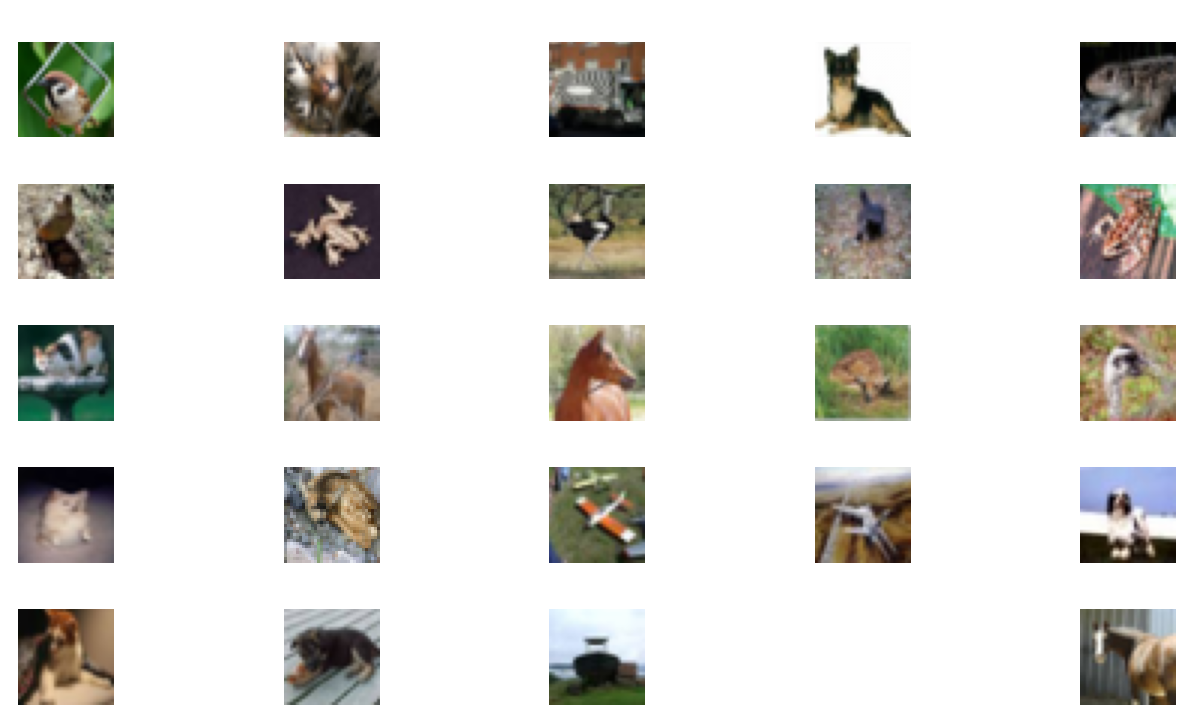

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

incorrect = incorrect_images(model, device, test_loader)
incorrect_examples = incorrect['images']
incorrect_pred = incorrect['Pred']
incorrect_target = incorrect['target']

inv_normalize = transforms.Normalize(
  mean=[-0.4890062/0.264582, -0.47970363/0.258996, -0.47680542/0.25643882],
  std=[1/0.264582, 1/0.258996, 1/0.25643882]
)


fig = plt.figure(figsize=(20,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  #plt.tight_layout(pad=0, w_pad=0, h_pad=0.4)
  #incorrect_examples_inv = inv_normalize(incorrect_examples[i])
  

  incorrect_examples_temp = inv_normalize(incorrect_examples[i])
  incorrect_examples_temp = incorrect_examples_temp.cpu().numpy()

  plt.imshow(np.transpose(incorrect_examples_temp, (1, 2, 0)).squeeze())
  plt.title(f"Predicted:{classes[incorrect_pred[i]]} \n Target:{classes[incorrect_target[i]]}",color='white',fontsize=16)
  plt.axis('off')
  plt.tight_layout() 
  

#plt.savefig('/content/drive/My Drive/models/incorrect_images.jpg', dpi=300, bbox_inches='tight')
plt.show()

## Check Accuracy of each class



In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device) 
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 94 %
Accuracy of   car : 89 %
Accuracy of  bird : 95 %
Accuracy of   cat : 90 %
Accuracy of  deer : 96 %
Accuracy of   dog : 76 %
Accuracy of  frog : 91 %
Accuracy of horse : 95 %
Accuracy of  ship : 100 %
Accuracy of truck : 100 %
